In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [5]:
data1 = data.drop(['Unnamed: 0',"Temp C"], axis = 1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [7]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [8]:
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [9]:
data1.drop_duplicates(keep='first', inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [10]:
data1.rename({'Solar.R': 'Solar'},axis=1,inplace=True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [11]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [12]:
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

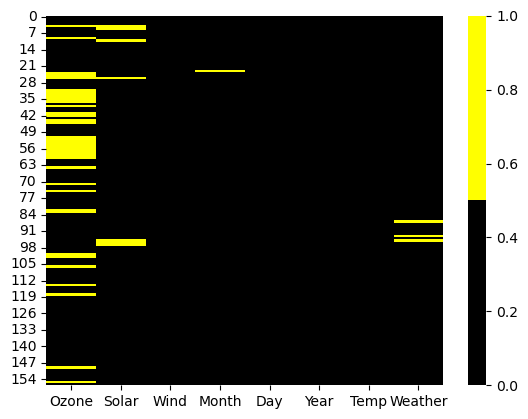

In [13]:
cols = data1.columns
colors = ['black','yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [14]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [15]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [16]:
median_Solar = data1["Solar"].median()
mean_Solar = data1["Solar"].mean()
print("Median of Solar: ", median_Solar)
print("Mean of Solar: ", mean_Solar)

Median of Solar:  199.0
Mean of Solar:  185.36666666666667


In [17]:
data1['Solar'] = data1['Solar'].fillna(median_Solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [18]:
print(data1["Weather"].value_counts())
mode_weather =data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [19]:
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram with KDE')

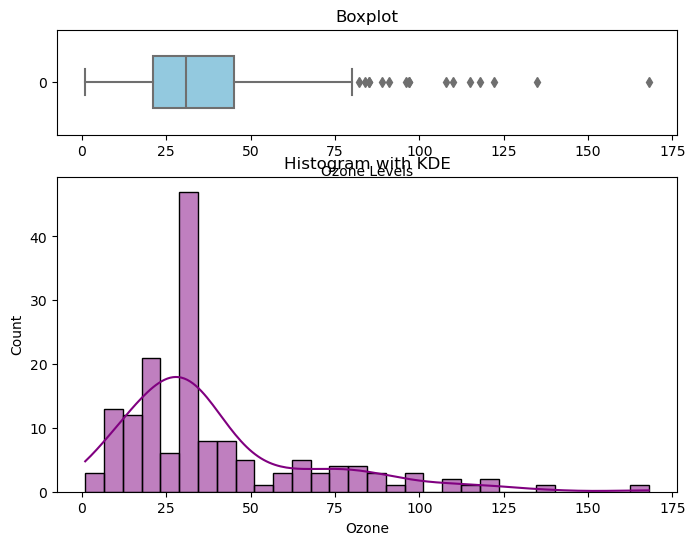

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6),gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue',width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins = 30)
axes[1].set_title("Histogram with KDE")

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

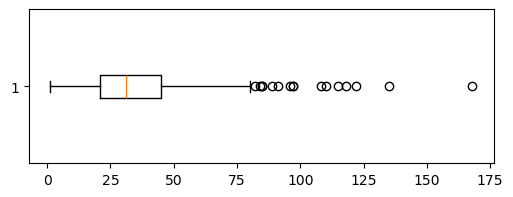

In [21]:
plt.figure(figsize=(6,2))
boxlot_data = plt.boxplot(data1["Ozone"], vert=False)
[item.get_xdata() for item in boxlot_data['fliers']]

In [22]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [23]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]
for x in data1["Ozone"]:
    if((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

135.0
168.0


/tmp/ipykernel_268/1593331225.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
/tmp/ipykernel_268/1593331225.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


In [24]:
###Observations
###it is observed that only two outliers are idenfied using std method
###in box plot method more no of outliers are identified
###this is because the assumption of normality is not satified in this colum

Text(0.5, 0, 'Theoretical Quantiles')

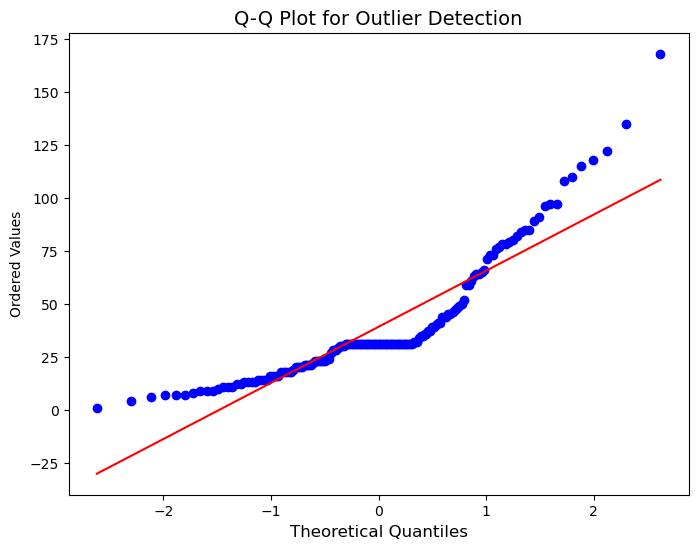

In [25]:
import scipy.stats as stats
plt.figure(figsize=(8,6))
stats.probplot(data1["Ozone"], dist="norm",plot=plt)
plt.title("Q-Q Plot for Outlier Detection",fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)


In [26]:
###Obervations from Q-Q plot
###The data does not follow normal distribution as the data points are deviating significantly away from the red line
###The data shows a right-skewed distribution and possible outliers

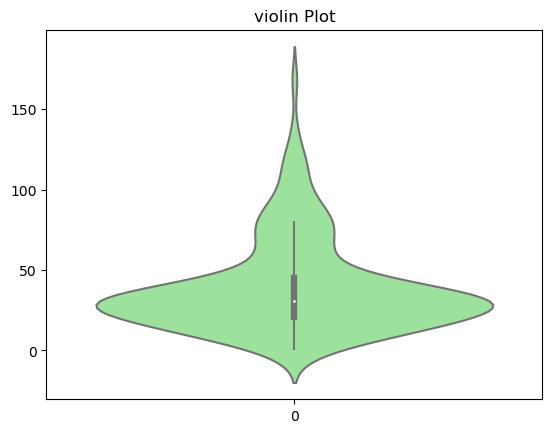

In [54]:
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("violin Plot")
plt.show()

/tmp/ipykernel_268/2024607535.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=data1, x = "Weather", y = "Ozone", color = "orange", palette = "Set2", size = 6)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weather', ylabel='Ozone'>

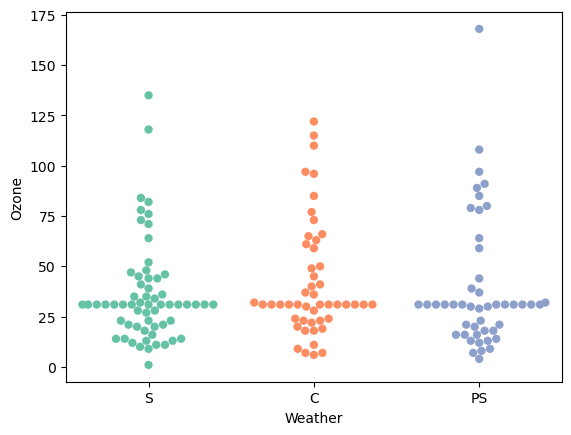

In [64]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone", color = "orange", palette = "Set2", size = 6)


/tmp/ipykernel_268/2773032954.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=data1, x = "Weather", y = "Ozone", color="Orange", palette="Set1", size=6, jitter = True)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weather', ylabel='Ozone'>

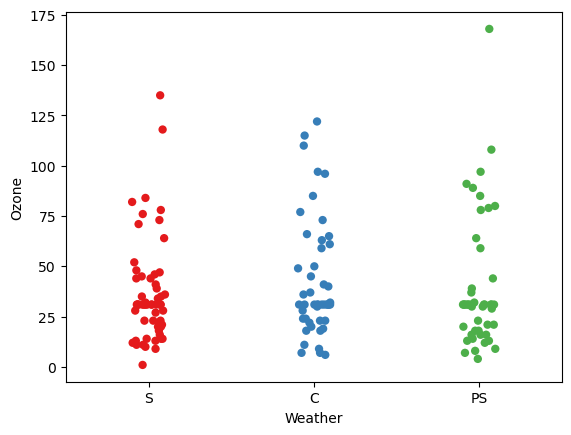

In [74]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone", color="Orange", palette="Set1", size=6, jitter = True)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ozone', ylabel='Density'>

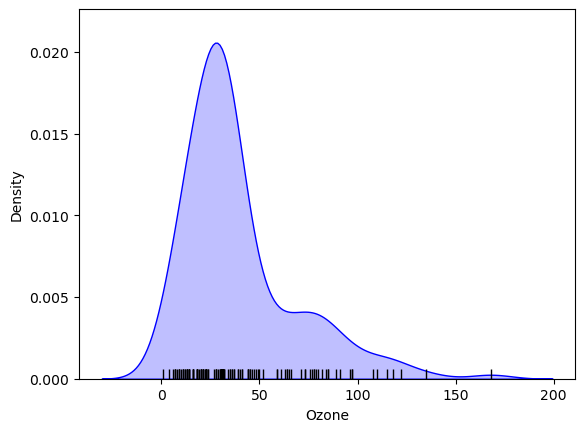

In [70]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

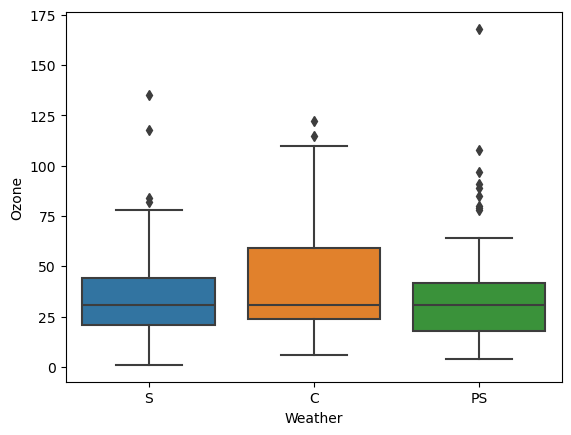

In [80]:
sns. boxplot(data = data1, x = "Weather", y = "Ozone")
             

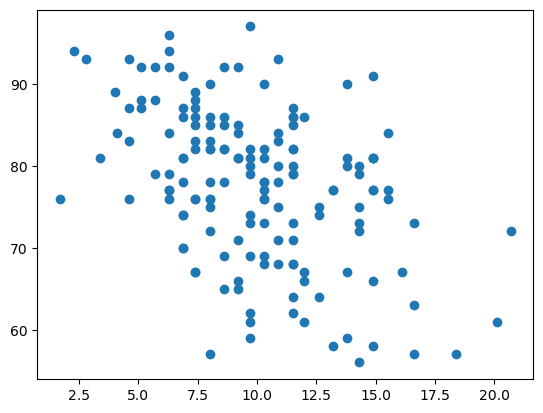

In [88]:
plt.scatter(data1["Wind"], data1["Temp"])

In [93]:
### Compute pearson correlation coefficient
###between wind speed and Temperature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

In [97]:
data1_numeric = data1.iloc[:,[0.1,2,6]]
data1_numeric

,Ozone,Wind,Temp
0,41.0,7.4,67
1,36.0,8.0,72
2,12.0,12.6,74
3,18.0,11.5,62
4,31.0,14.3,56
...,...,...,...
152,20.0,11.5,68
153,41.0,7.4,67
154,30.0,6.9,70
155,31.0,13.2,77
